# **Klasifikasi Diagnosis Kanker Payudara Menggunakan Decision Tree dengan Diskretisasi Data pada Dataset Breast Cancer Wisconsin (Diagnostic)**

# **Pendahuluan**

# **Tujuan**

# **Data Understanding**

Dataset diambil dari link berikut:

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic



In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

# **Tujuan**

Dataset ini digunakan untuk mengembangkan model prediktif dalam mendeteksi apakah seseorang berisiko menderita diabetes atau tidak, guna mendukung analisis kesehatan masyarakat dan membantu upaya pencegahan dini.

## **Data Understanding**


###**A. Jelaskan setiap fitur atau variable data tersebut**

1. **ID**
- Nomor identifikasi pasien (tidak digunakan dalam analisis atau pemodelan).

2.   **Diagnosis**
- Hasil diagnosis kanker:
  - M = Malignant (ganas)
  - B = Benign (jinak)
---
**Fitur-Fitur Diagnosis Sel (30 fitur)**

Terdapat **10 karakteristik sel**, dan masing-masing diukur dalam 3 jenis statistik:

* `_mean` = rata-rata
* `_se` = standard error (galat baku)
* `_worst` = nilai maksimum (dari 3 sel terbesar)

| Karakteristik          | Penjelasan                                                  |
| ---------------------- | ----------------------------------------------------------- |
| **radius**             | Jarak dari pusat ke batas sel (seperti jari-jari lingkaran) |
| **texture**            | Variasi tingkat abu-abu (tekstur visual pada gambar sel)    |
| **perimeter**          | Keliling sel                                                |
| **area**               | Luas area sel                                               |
| **smoothness**         | Kehalusan tepi sel (perubahan lokal)                        |
| **compactness**        | Ukuran kepadatan: (perimeter² / area) - 1.0                 |
| **concavity**          | Tingkat cekungan pada batas sel                             |
| **concave points**     | Jumlah titik cekung (lekukan ke dalam) di tepi sel          |
| **symmetry**           | Tingkat simetri bentuk sel                                  |
| **fractal\_dimension** | Kompleksitas batas sel (menggunakan dimensi fraktal)        |

---

### **Contoh Nama Kolom (fitur)**

* `radius_mean`, `radius_se`, `radius_worst`
* `area_mean`, `area_se`, `area_worst`
* `texture_mean`, dst.

---

Jadi total ada:

* **1 kolom ID**
* **1 kolom Diagnosis**
* **30 fitur pengukuran sel**
  \= **32 kolom** total dalam dataset.


###**Ekplorasi data tersebut (kualitas data: apakah ada outlier atau tidak, ada miisin value atau tidak, atau )**

**Missing Value**


In [8]:
# Cek jumlah missing values
print(X.isnull().sum().sum())


0


**Distribusi Target (Diagnosis)**

In [9]:
# Cek distribusi kelas diagnosis
print(y.value_counts())


Diagnosis
B            357
M            212
Name: count, dtype: int64


**Cek Outlier**

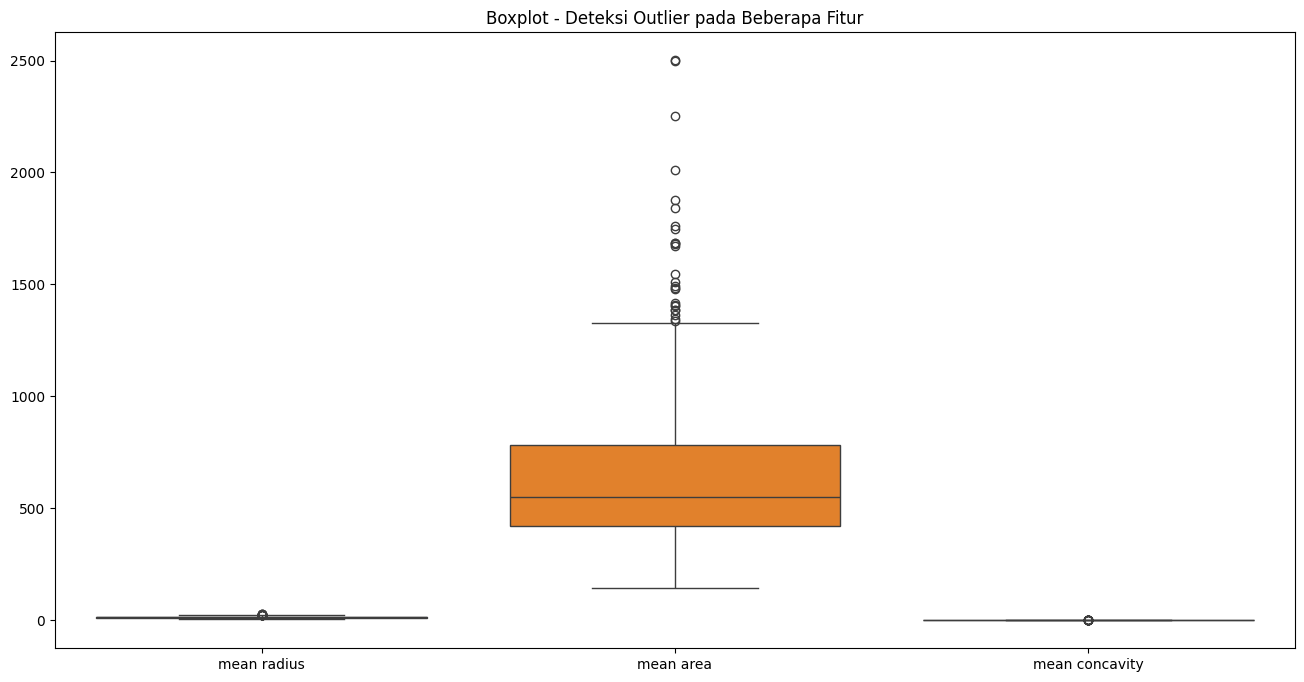

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.boxplot(data=X[['mean radius', 'mean area', 'mean concavity']])
plt.title("Boxplot - Deteksi Outlier pada Beberapa Fitur")
plt.show()


**Distribusi Data dan Korelasi**

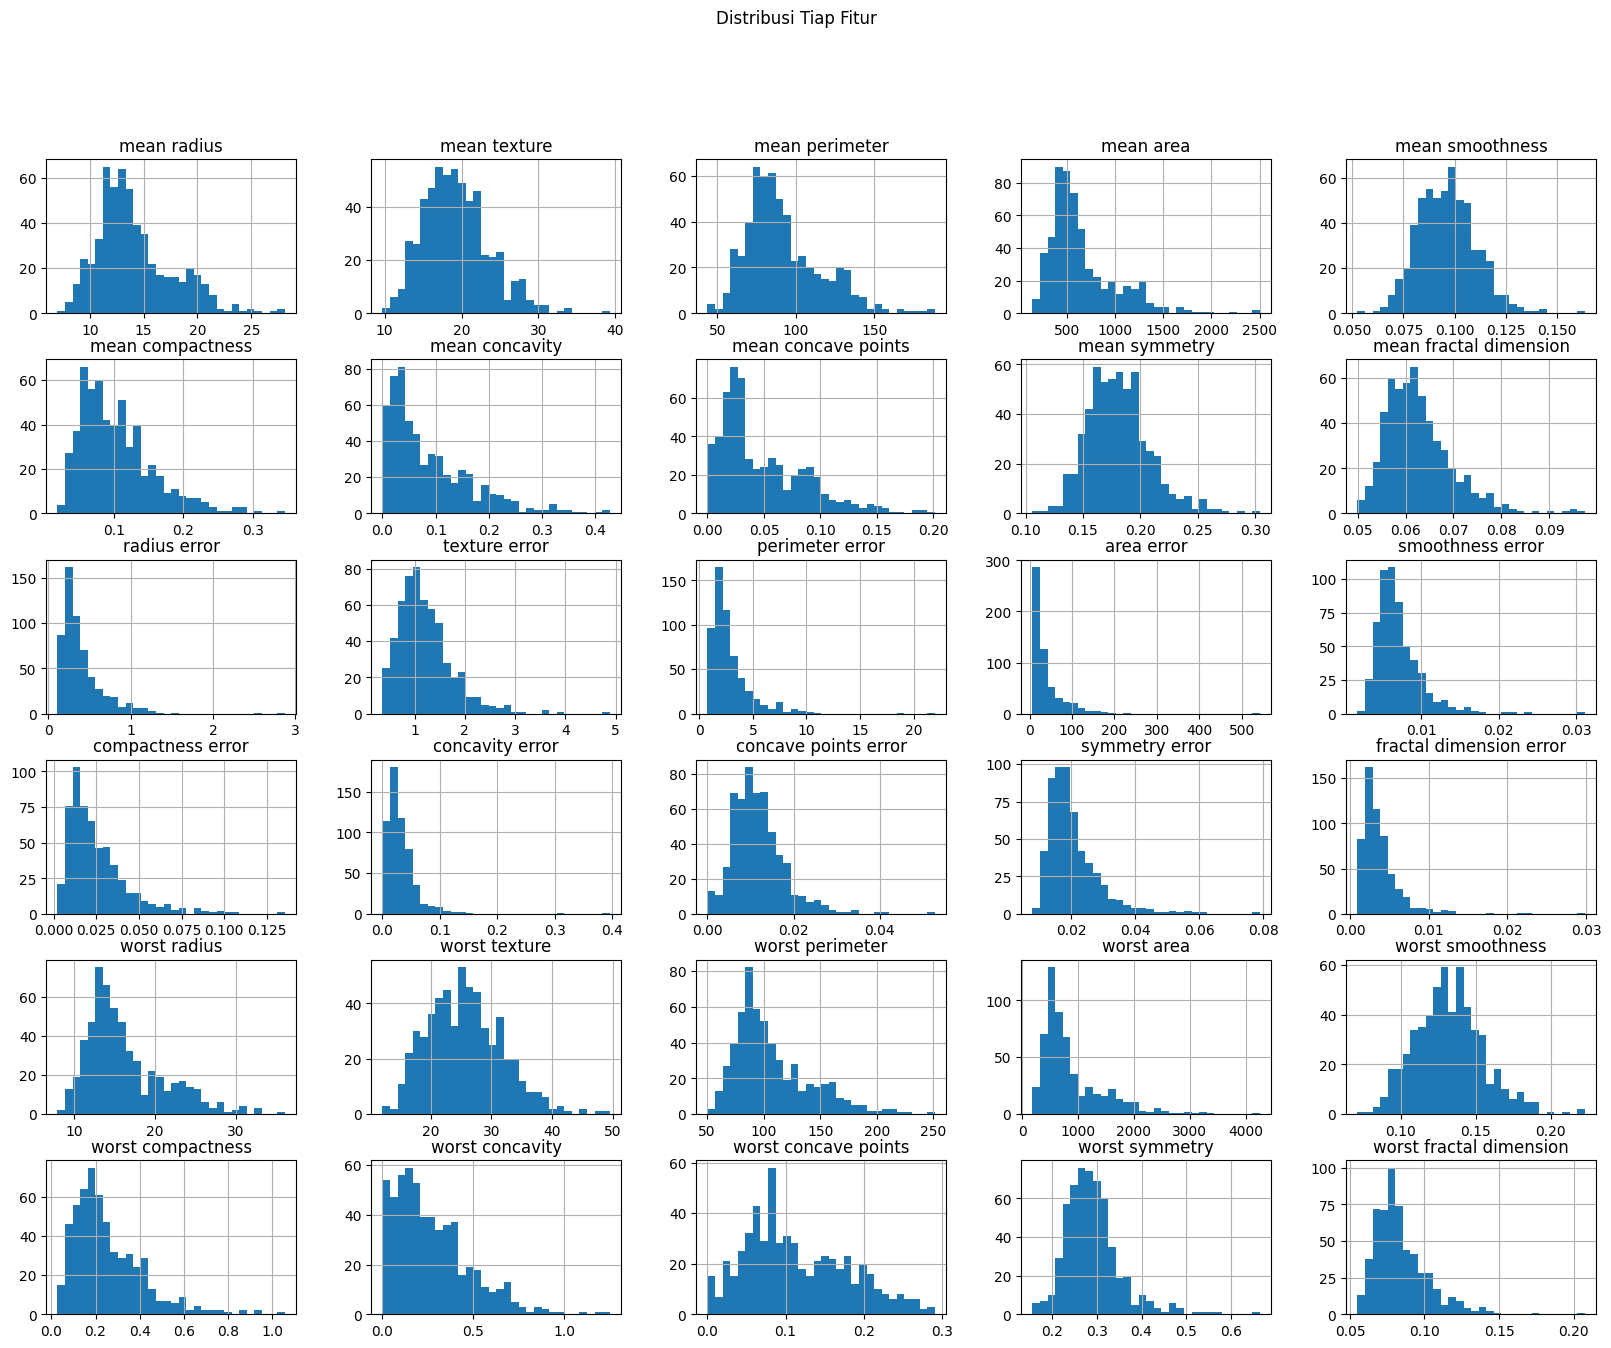

In [15]:
X.hist(figsize=(20, 15), bins=30)
plt.suptitle("Distribusi Tiap Fitur")
plt.show()


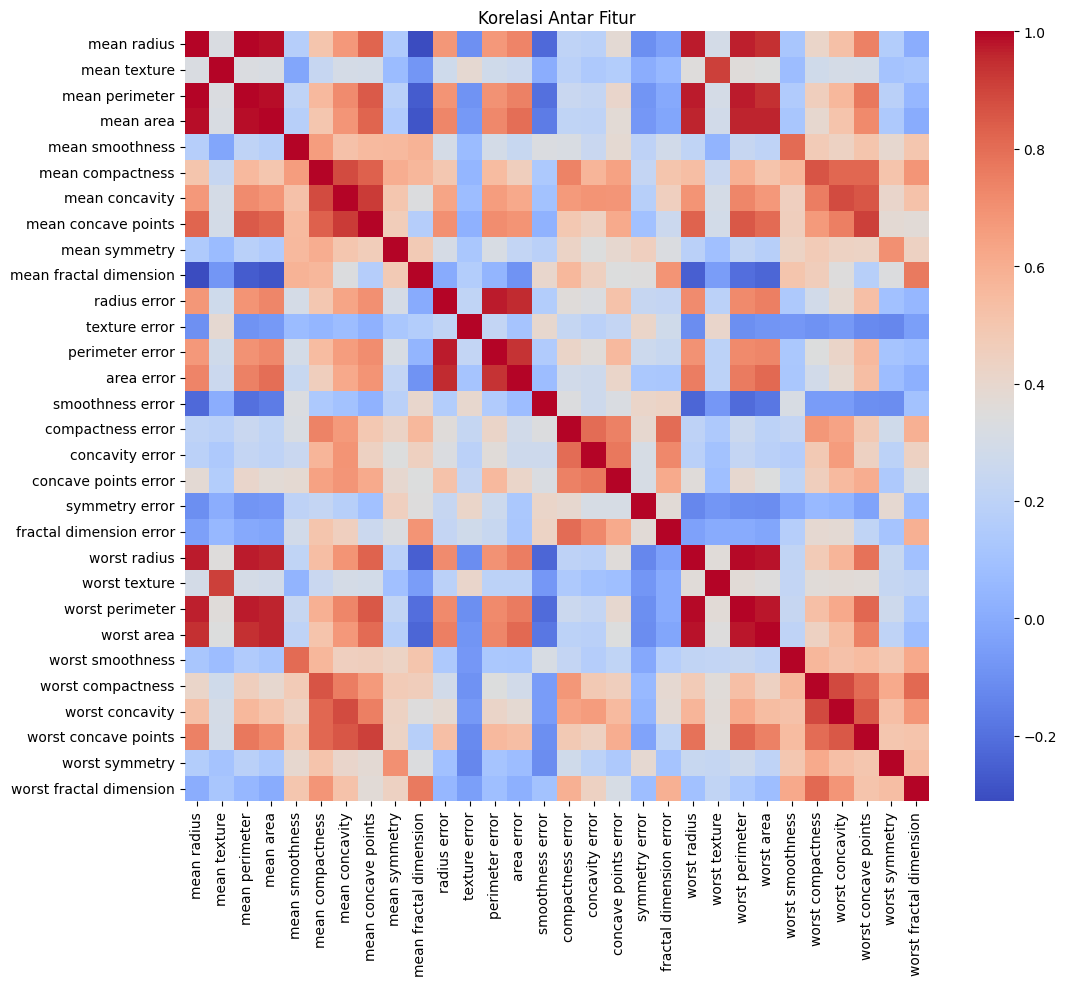

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()
